Text(0.5, 1.0, 'Antal döda i riskgruppen/inte i riskgruppen')

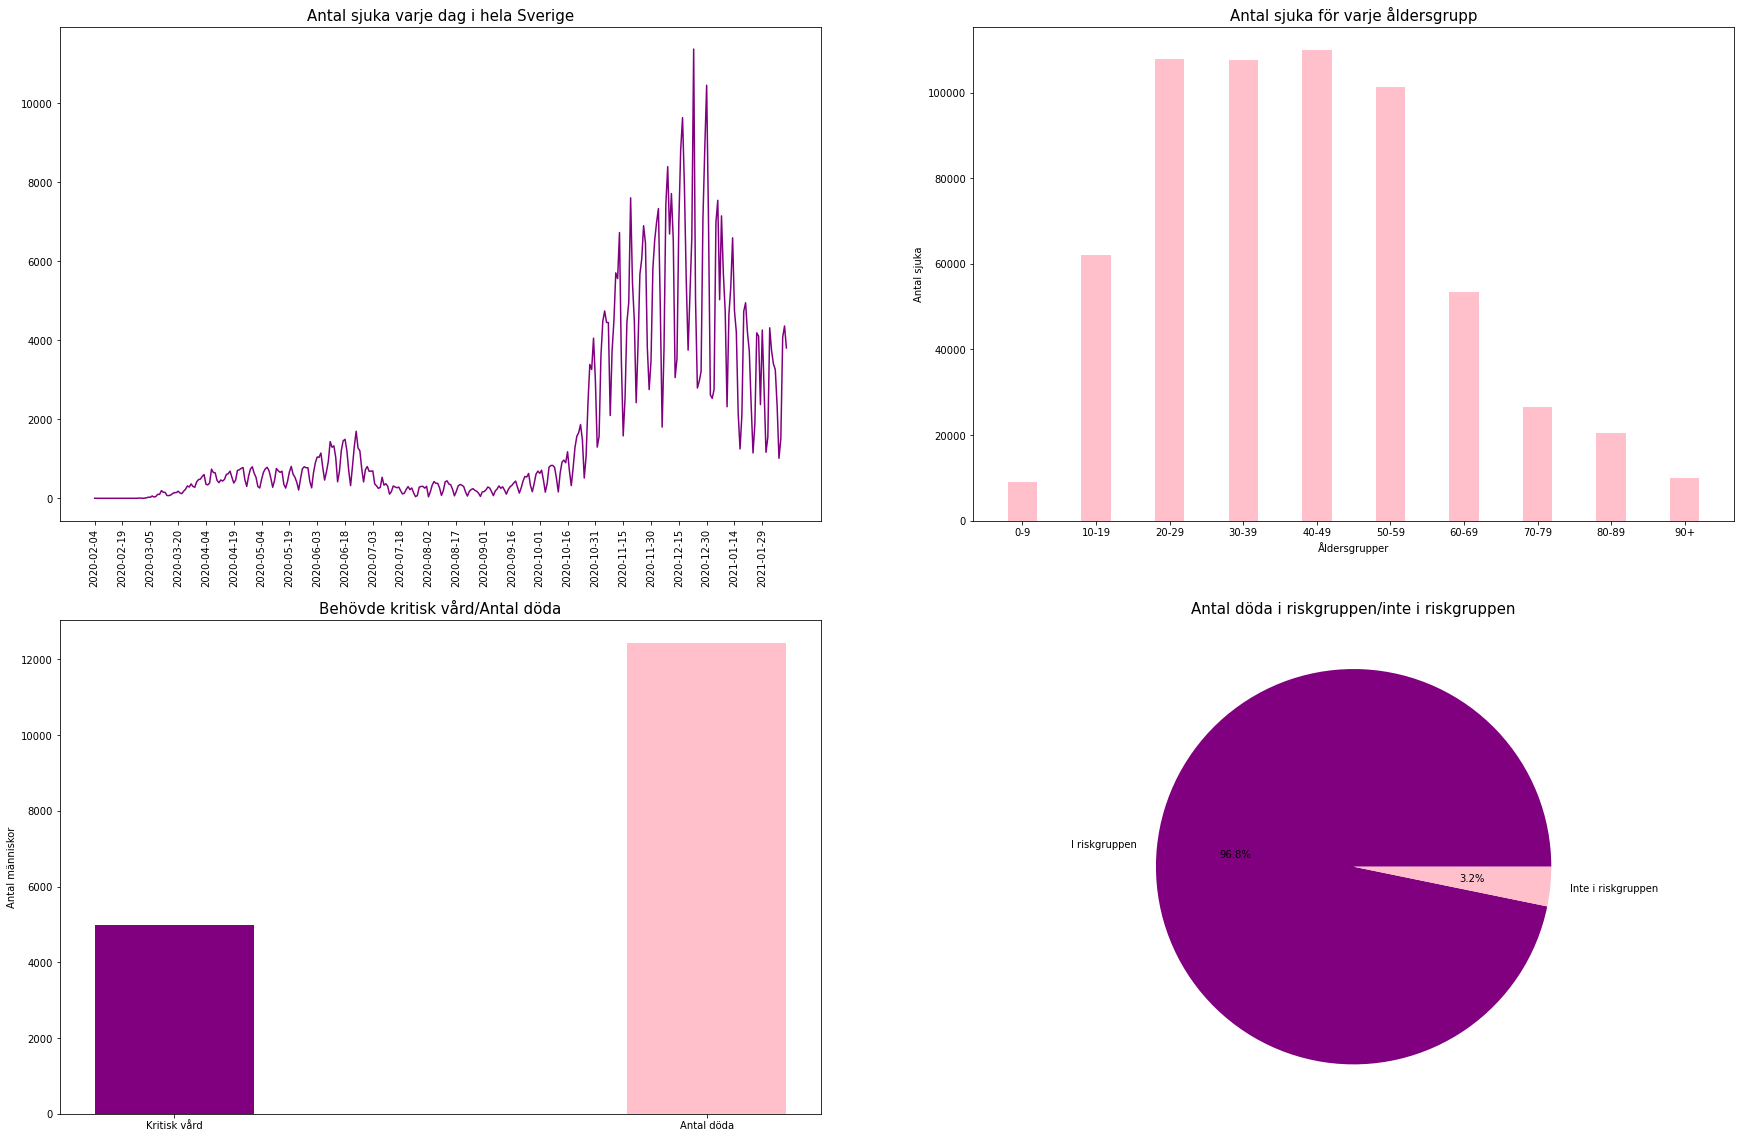

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

#Läser in filerna
sverige_df = pd.read_csv("Regional_Daily_Cases.csv")
df = pd.read_csv("National_Total_Deaths_by_Age_Group.csv")

#Skapar variablar med informationen som behövs 
datum = sverige_df["Date"]
antal_sjuka = sverige_df["Sweden_Total_Daily_Cases"]

ålder = df["Age_Group"]
antal_sjuka2 = df["Total_Cases"]

antal_döda = df["Total_Deaths"].tolist()
antal_döda = sum(antal_döda) #Adderar alla som dött

kritisk_vård = df["Total_ICU_Admissions"].tolist()
kritisk_vård = sum(kritisk_vård) #Adderar alla som behövde kritisk vård

under_60 = df.head(6)["Total_Deaths"].tolist() #Väljer bara de 6 första raderna i filen
under_60 = sum(under_60) #Adderar alla som dött av de 6 första raderna
över_60 = df.iloc[6:10]["Total_Deaths"].tolist() #Väljer raderna 6-10 i filen
över_60 = sum(över_60) #Adderar alla som dött från raderna 6-10

plt.figure(figsize=(30,20)) #Ändrar storleken på subploten

plt.subplot(2,2,1) #Sätter diagramet som den första i subploten
plt.plot(datum, antal_sjuka, color="purple") #Skapar ett linjediagram där x-axeln är datumen och y-axeln är antal sjuka varje dag
plt.xticks(range(0, 375, 15)) #Tar varje 15 rad av datumen och sätter de på x-axeln
plt.xticks(rotation=90) #Roterar x-axelns text 90 grader
plt.title("Antal sjuka varje dag i hela Sverige", fontsize=15) #Ger grafen en titel
plt.show

plt.subplot(2,2,2) #Sätter diagramet som den andra i subploten
color = ["pink"]
plt.bar(df["Age_Group"].unique(), df["Total_Cases"].unique(), width=0.4, color=color) #Skapar ett stapeldiagramm med antalet sjuka för varje åldersgrupp
plt.ylabel("Antal sjuka") #Ger y-axeln ett namn
plt.xlabel("Åldersgrupper") #Ger x-axel ett namn
plt.title("Antal sjuka för varje åldersgrupp", fontsize=15) #Ger grafen en titel

plt.subplot(2,2,3) #Sätter diagramet som den första på andra raden i subploten
color2 = ["purple", "pink"]
label = ["Kritisk vård", "Antal döda"] #Ger x-axeln namn
andel = [kritisk_vård, antal_döda] #ger x-axeln informationen
plt.bar(label, andel, width=0.3, color=color2) #Skapar ett stapeldiagram där x-axeln är de som behövde ktiskt vård och de som dog och y-axlen är antalet människor
plt.ylabel("Antal människor") #Ger y-axeln ett namn
plt.title("Behövde kritisk vård/Antal döda", fontsize=15) #ger grafen ett namn

plt.subplot(2,2,4) #Sätter diagramet som den första på andra raden i subploten
label2 = "I riskgruppen", "Inte i riskgruppen" #Ger cirkeldiagrammets olika delar namn
andel2 = [över_60, under_60]
plt.pie(andel2, labels=label2, colors=color2, autopct="%1.1f%%") #Skapar ett cirkelndiagram med antalet som dog i riskgruppen och antalet som dog inte i riskgruppen
plt.title("Antal döda i riskgruppen/inte i riskgruppen", fontsize=15) #Ger diagramet en titel
